<a href="https://colab.research.google.com/github/itarasingh/Bookings/blob/main/EDA_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis


##### **Project Type**    - EDA
##### **Contribution**    - Individual (Tara Singh)



# **Project Summary -**

# **GitHub Link -**https://github.com/itarasingh/Bookings

# **Problem Statement**


Have you ever thought about when it's best to book a hotel room or how long to stay to get the best price? Maybe you've wondered if certain hotels get more special requests than others. Well, this dataset about hotel bookings can help answer those questions! It has information about bookings for both city and resort hotels, like when they were made, how long people stayed, and how many adults, children, or babies were there. You can explore the data to find out what factors affect hotel bookings the most.

#### **Define Your Business Objective?**

Business objective is to understand and visualize dataset from hotel and customer point of view.

1) Reasons for booking cancellations

2)Best time to book hotel

3)Peak season

4) suggestions to reduce cancellations

5) increase revenue of hotels.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import data analysis Libraries
import numpy as np
import pandas as pd

# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for plotting
import plotly.express as px

# some additional libraries
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
hotel_booking_df = pd.read_csv('https://raw.githubusercontent.com/itarasingh/Bookings/refs/heads/main/Hotel%20Bookings.csv')

### Dataset First View

In [3]:
# first 5 rows of the datset
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# view of last 5 rows of the data
hotel_booking_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'Total number of rows : {hotel_booking_df.shape[0]}\nTotal number of columns :{hotel_booking_df.shape[1]}')

Total number of rows : 119390
Total number of columns :32


### Dataset Information

In [6]:
# Dataset Info
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [7]:
# Count of duplicate values
print(f'Total number of duplicate values : {hotel_booking_df.duplicated().sum()}')

Total number of duplicate values : 31994


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
null_value_count = hotel_booking_df.isna().sum().sort_values(ascending = False)

# Print only columns with missing values
null_value_count = null_value_count[null_value_count>0]
print('Number of null values these coloumn contains:\n',null_value_count)


Number of null values these coloumn contains:
 company     112593
agent        16340
country        488
children         4
dtype: int64


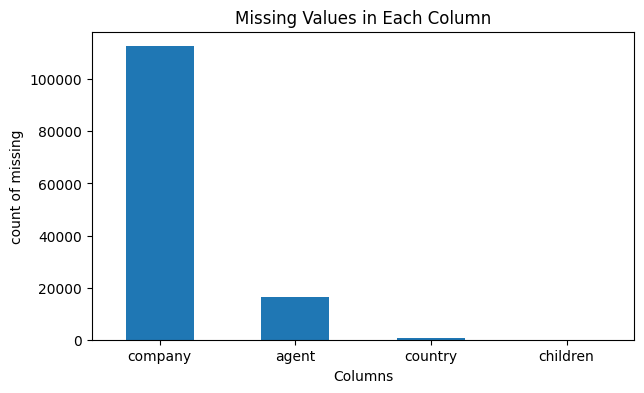

In [9]:
# Visualizing the missing values

# Create a bar plot
plt.figure(figsize=(7, 4))
null_value_count.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('count of missing')
plt.xticks(rotation=360)
plt.show()


### What did you know about your dataset?

This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.It includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. The dataset contains a total of 119390 rows and 32 columns.Dataset Contains duplicated items i.e 31944 which is removed later.Also it have null values in company , agent , country, children column. Company has extremely large number of null values as compared to other columns.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
list(hotel_booking_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [11]:
# Dataset Describe
hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

***The columns and the data they represent are listed below:***
        
1. **hotel :** Name of the hotel (Resort Hotel or City Hotel)

2. **is_canceled :** If the booking was canceled (1) or not (0)

3. **lead_time:** Number of days before the actual arrival of the guests

4. **arrival_date_year :** Year of arrival date

5. **arrival_date_month :** Month of month arrival date

6. **arrival_date_week_number :** Week number of year for arrival date

7. **arrival_date_day_of_month :** Day of arrival date

8. **stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

9. **stays_in_week_nights :** Number of weeknights (Monday to Friday) spent at the hotel by the guests.

10. **adults :** Number of adults among guests

11. **children :** Number of children among guests

12. **babies :** Number of babies among guests

13. **meal :** Type of meal booked

14. **country :** Country of guests

15. **market_segment :** Designation of market segment

16. **distribution_channel :** Name of booking distribution channel

17. **is_repeated_guest :** If the booking was from a repeated guest (1) or not (0)

18. **previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

19. **previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

20. **reserved_room_type :** Code of room type reserved

21. **assigned_room_type :** Code of room type assigned

22. **booking_changes :** Number of changes/amendments made to the booking

23. **deposit_type :** Type of the deposit made by the guest

24. **agent :** ID of travel agent who made the booking

25. **company :** ID of the company that made the booking

26. **days_in_waiting_list :** Number of days the booking was in the waiting list

27. **customer_type :** Type of customer, assuming one of four categories

28. **adr :** Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. **required_car_parking_spaces :** Number of car parking spaces required by the customer

30. **total_of_special_requests :** Number of special requests made by the customer

31. **reservation_status :** Reservation status (Canceled, Check-Out or No-Show)

32. **reservation_status_date :** Date at which the last reservation status was updated

    

### Check Unique Values for each variable.

In [12]:
# # Check Unique Values for each variable.
print(hotel_booking_df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## 3. ***Data Wrangling***

### Data Wrangling Code

Dropping duplicates

In [13]:
# Dropping the duplicate values
hotel_booking_df.drop_duplicates(inplace = True)

In [14]:
# after removing duplicate , count of total rows
print(f'After removing duplicates , number of rows are :  {hotel_booking_df.shape[0]}')

After removing duplicates , number of rows are :  87396


Relacing null values

In [15]:
# droping the company coloumn as it  has highest null values
hotel_booking_df.drop(['company'], axis=1, inplace=True)

# replacing null values in children column with 0  as there are only 4 missing values ,assuming that family had 0 children
# replacing null values in agent column with 0 assuming those rooms were booked without company/agent
hotel_booking_df[['children','agent']] = hotel_booking_df[['children','agent']].fillna(0)


In [16]:
# replacing null values in country column as 'Others' assuming that user didnt found their country name
hotel_booking_df['country'].fillna('Others', inplace = True)

In [17]:
# checking that now there are no null values
hotel_booking_df.isna().sum().sort_values(ascending=False)

,0
hotel,0
is_repeated_guest,0
reservation_status,0
total_of_special_requests,0
required_car_parking_spaces,0
adr,0
customer_type,0
days_in_waiting_list,0
agent,0
deposit_type,0


In [18]:
# There are some rows with total number of adults, children or babies equal to zero
# this means there is no any booking were made.
# So we can remove such rows

In [19]:
# number of rows having with 0 in adult babies and children coloumn
zero_entry=hotel_booking_df[hotel_booking_df['adults']+hotel_booking_df['babies']+hotel_booking_df['children'] == 0].shape[0]
print(f"There are {zero_entry} rows which has zero value")

There are 166 rows which has zero value


In [20]:

hotel_booking_df.drop(hotel_booking_df[hotel_booking_df['adults']+hotel_booking_df['babies']+hotel_booking_df['children'] == 0].index, inplace = True)

## changing data type

In [21]:
#showing the info of the data to check datatype
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [22]:
# We have seen that childern & agent column as datatype as float whereas it contains only int value,so change datatype as int64
hotel_booking_df[['children', 'agent']] = hotel_booking_df[['children', 'agent']].astype('int64')

In [23]:
# for our understanding, in column 'is_canceled' we will replace the value from (0,1) to not_canceled, is canceled.
hotel_booking_df['is_canceled'] = hotel_booking_df['is_canceled'].replace([0,1], ['not canceled', 'is canceled'])


In [24]:
#Same for 'is_repeated_guest' column
hotel_booking_df['is_repeated_guest'] = hotel_booking_df['is_repeated_guest'].replace([0,1], ['not repeated', 'repeated'])

## addition of new coloumns

In [25]:
#total stay in nights
# We have created a col for total stays in nights by adding week night & weekend nights stay col.
hotel_booking_df['total_stay_in_nights'] = hotel_booking_df ['stays_in_week_nights'] + hotel_booking_df ['stays_in_weekend_nights']

In [26]:
# We have created a col for revenue using total stay * adr
hotel_booking_df['revenue'] = hotel_booking_df['total_stay_in_nights'] *hotel_booking_df['adr']
hotel_booking_df['revenue']

,revenue
0,0.00
1,0.00
2,75.00
3,75.00
4,196.00
...,...
119385,672.98
119386,1578.01
119387,1103.97
119388,730.80


In [27]:
# Also, for information, we will add a column with total number of guests coming for each booking
hotel_booking_df['total_guest'] = hotel_booking_df['adults'] + hotel_booking_df['children'] + hotel_booking_df['babies']

### What all manipulations have you done and insights you found?

**1**)Dropping duplicates : There were total number of duplicate values was 31994 . So first we have dropped these duplicates to clean the data. Now number of rows are after removing duplicates are 87396.



**2**)Handling Null Values: 'children', 'country', 'agent', and 'company'.
These are the column with null values and droping the company coloumn as it  has highest null values


*   Then replacing null values in agent column with 0 assuming those rooms were booked without company/agent

*   Then I have filled  null values in children column with 0  as there are only 4 missing values ,assuming that family had 0 children.
*   Replacing null values in the country column with 'others'to avoid confusion.




**3**) There are some rows with total number of adults, children or babies equal to zero , this means there is no any booking were made . So we have removed 166 rows having with 0 in adult ,babies and children coloumn

**4**)Childern & agent column  datatype was float but it contains only int value,so change datatype as int64.

**5**)for our understanding, in column 'is_canceled' we will replace the value from (0,1) to not_canceled, is canceled and same done for 'is_repeated_guest' column

**6)**There are few columns required in Data to analysis purpose which is created from the given columns.

Total Guests: This columns will help us to evaluate the volumes of total guest and revenue as well. We get this value by adding total no. of Adults, Children & babies.

Revenue : We find revenue by multiplying adr & total guest. This column will use to analyse the profit and growth of each hotel.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **UNIVARIATE ANALYSIS**

### **Chart - 1**


**Which type of hotel is preffered by guests resort or city ?**

In [28]:
# count occurence of each hotel type in hotel column
hotel_counts = hotel_booking_df['hotel'].value_counts()
hotel_counts

,count
hotel,
City Hotel,53274
Resort Hotel,33956


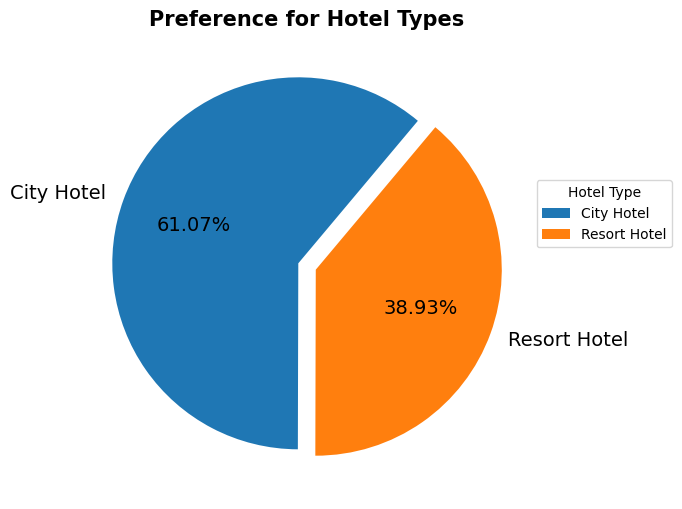

In [29]:
# visualize the data
# Plot a pie chart
plt.figure(figsize = (6,7))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.2f%%', startangle=50, explode=[0.05, 0.05], textprops={'fontsize': 14})
plt.title('Preference for Hotel Types', fontsize=15, fontweight='bold')
plt.legend(title='Hotel Type',bbox_to_anchor=(1.3, 0.7))

# display the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart helps in comparision of data and also it shows the fractional part of whole.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see from visualization that city hotel has higher number of bookings ie. 61.07%  and resort hotel has 38.93 % bookings only


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Gained sights helped in creating positive business impact as in city hotel it can provide more services to increase their revenue. In resort hotel it can improve thier services to attract more customers.

### **Chart - 2**

**How many guests repeated ?**

In [30]:
# count occurences of repeated and non repeated in is_repeated_col
guest_repeat = hotel_booking_df['is_repeated_guest'].value_counts()

In [31]:
guest_repeat

,count
is_repeated_guest,
not repeated,83866
repeated,3364


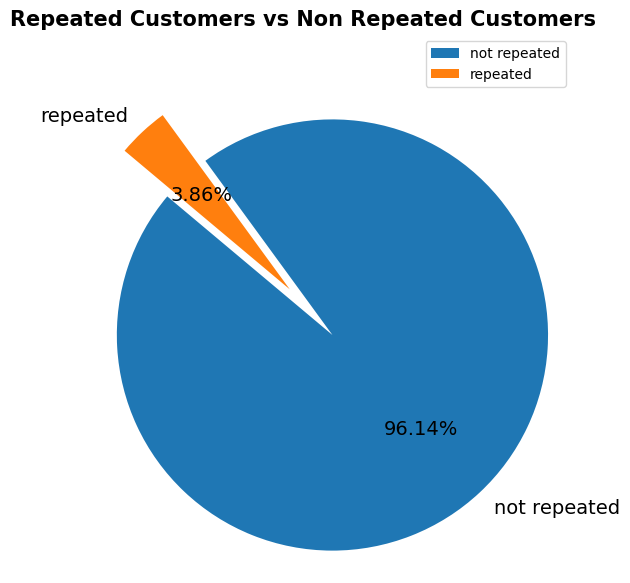

In [32]:
# visualize the data
# Plotting a pie chart
plt.figure(figsize = (7,7))
plt.pie(guest_repeat, labels=guest_repeat.index, autopct='%1.2f%%', startangle=140, explode=[0.2, 0.09], textprops={'fontsize': 14})
plt.title('Repeated Customers vs Non Repeated Customers', fontsize=15, fontweight='bold')
plt.legend()
# display the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

To show the percentage share of repeated & non-repeated guests pie chart helps for comparision

##### 2. What is/are the insight(s) found from the chart?

The number of repeated guests is very less as compared to overall guests, its only 3.86%


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Taking feedback from guests so that hotel can imporve their services.
Giving seasonal discounts and offers,can attract non repeating customers to visit hotel again that will have postive impact on business

#### **Chart - 3**

**What is the percentage of cancellation?**

In [33]:
# count of canceled and non-canceled bookings
cancel_count = hotel_booking_df['is_canceled'].value_counts()

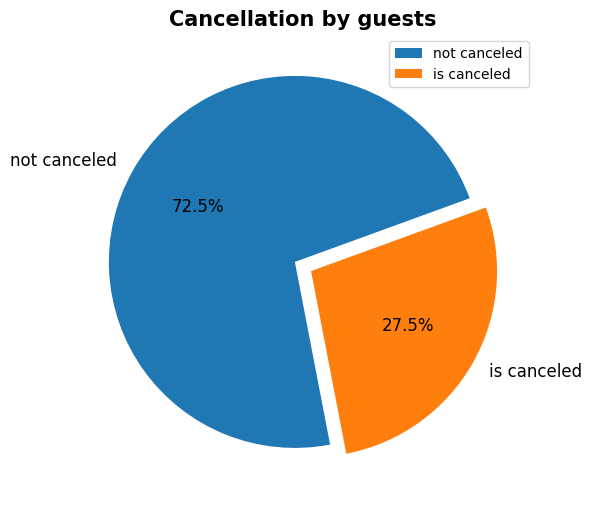

In [34]:
# visualize the data
# Plotting a pie chart
plt.figure(figsize = (6,7))
plt.pie(cancel_count, labels=cancel_count.index, autopct='%1.1f%%', startangle=20, explode=[0.05, 0.05], textprops={'fontsize': 12})
plt.title('Cancellation by guests', fontsize=15, fontweight='bold')
plt.legend()
# display the pie chart
plt.show()

##### 1. Why did you pick the specific chart?

This chart presentes the cancellation rate of the hotels booking.

##### 2. What is/are the insight(s) found from the chart?

Guests who cancelled are more than 27% .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Around 72.5% guests didnt cancel their booking so, its a positve impact on hotel. Cancellation rate is 27.5% , from business persecptive cancellation rate is quite high.
We need to findout the reason of cancellation by taking feedback from guest.

#### **Chart - 4**

**Which type of food is mostly preferred by the guests?**

In [35]:
# count occurences each meal type
meal_count=hotel_booking_df['meal'].value_counts()
meal_count

,count
meal,
BB,67907
SC,9391
HB,9080
Undefined,492
FB,360


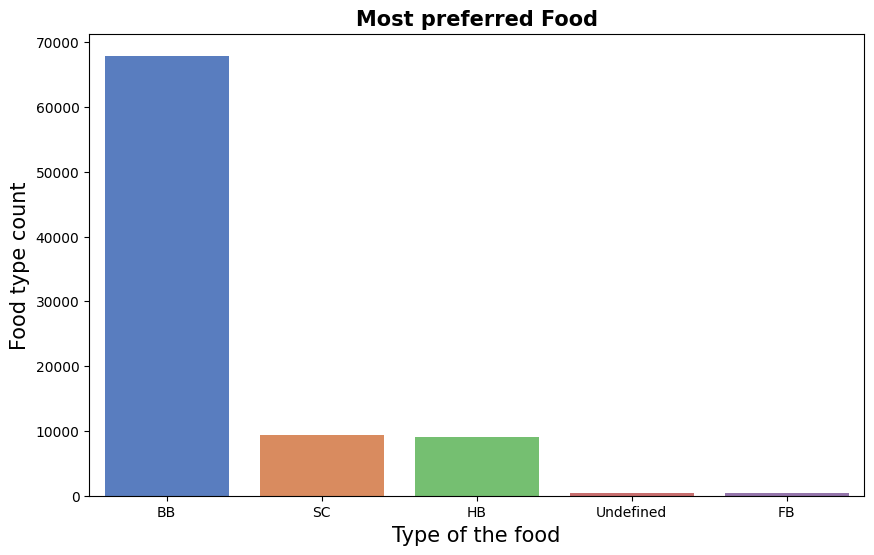

In [36]:
# .visualize the data
plt.figure(figsize=(10,6))
sns.countplot(x=hotel_booking_df['meal'],order=meal_count.index,palette="muted")

plt.title("Most preferred Food",fontsize=15, fontweight='bold')
plt.xlabel('Type of the food', fontsize = 15)
plt.ylabel('Food type count', fontsize = 15)
plt.show()

Types of meal in hotels:

BB - (Bed and Breakfast)
HB- (Half Board)
FB- (Full Board)
SC- (Self Catering)

##### 1. Why did you pick the specific chart?

**I have choose barchart to visualize most preferred food because it displays the count of each observation for each category and here we have to find which food is most preferred


##### 2. What is/are the insight(s) found from the chart?

Bed and Breakfast is the most preferred food by 67907 guests

Self catering and Half board are equally preferred but very less in comparison to BB

Full board is least preferred food i.e only 360 guest ordered it

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

BB type of food is most preferred food this makes positive impact on business.
Undefined and FB type of food is less preferred this insight makes neative impact on business.

### **Chart - 5**

**What is most preferred room type by guests?**

In [37]:
# count of room type booked by guest
room_count=hotel_booking_df['assigned_room_type'].value_counts()
room_count

,count
assigned_room_type,
A,46283
D,22419
E,7190
F,3627
G,2495
C,2160
B,1811
H,706
I,353


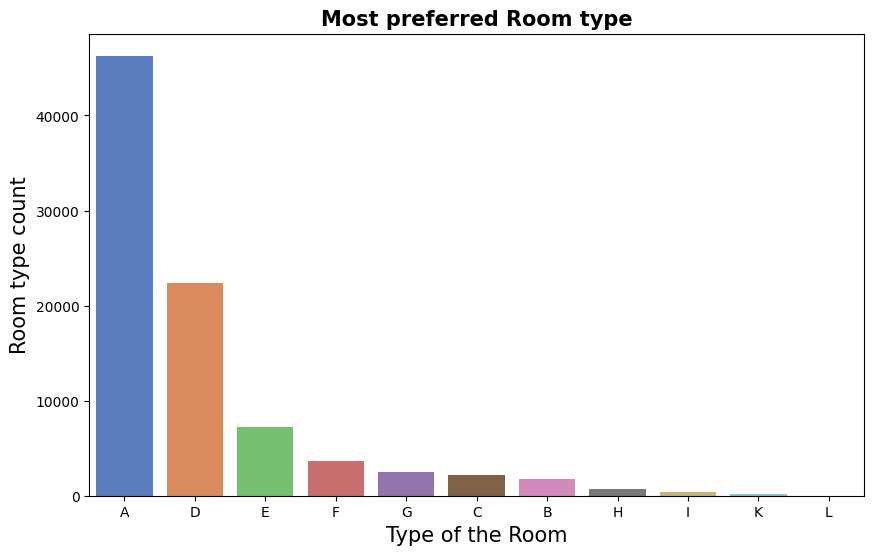

In [38]:
# visualize the data
plt.figure(figsize=(10,6))
sns.countplot(x=hotel_booking_df['assigned_room_type'],order=room_count.index , palette='muted')
plt.title("Most preferred Room type",fontsize=15, fontweight='bold')
plt.xlabel('Type of the Room', fontsize = 15)
plt.ylabel('Room type count', fontsize = 15)

plt.show()


##### 1. Why did you pick the specific chart?

 I have choose countplot to visualize most prefferd roomtype because countplot display the count of each observation for each category and here we have to represent room type vs room type count.

##### 2. What is/are the insight(s) found from the chart?

The insighte found from the chart is A type rooms are most prefered rooms and the count is 46283 and after that D type rooms are prefered by the guest and count is 22419.

Least preffered room is K and L. K type room is preffered by only 185 and only 1 guest has booked L type room.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A type rooms are most preferred rooms. This make positive impact on business.
H,I,K,L type rooms are less preferred this insight makes neative impact.
This is beacause type A rooms have 46283 bookings anf type L room has only one booking.

### **Chart - 6**

**Which agent made the most bookings?**



In [39]:
# count top 10 agent with most bookings
top_agent=hotel_booking_df['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'num_of_bookings'})[:10]
# rename column name for better understanding
top_agent

,num_of_bookings,count
0,9,28721
1,240,13028
2,0,12141
3,14,3342
4,7,3294
5,250,2779
6,241,1644
7,28,1493
8,8,1383
9,1,1228


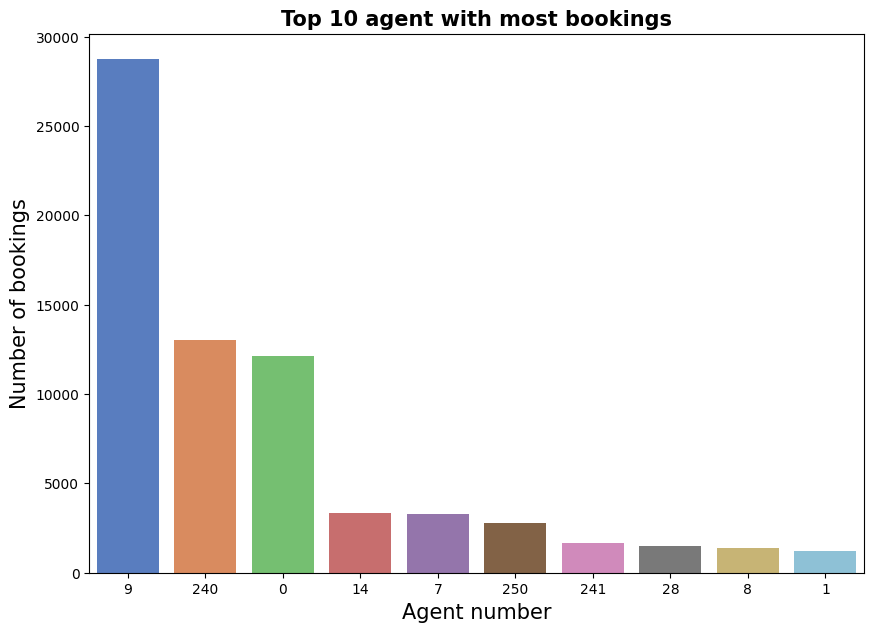

In [40]:
# visualize the data
plt.figure(figsize=(10,7))
sns.countplot(x=hotel_booking_df['agent'],order=hotel_booking_df['agent'].value_counts().index[:10], palette='muted')
plt.title('Top 10 agent with most bookings',fontsize=15, fontweight='bold')

plt.ylabel('Number of bookings', fontsize=15)
plt.xlabel('Agent number', fontsize=15)

plt.show()

##### 1. Why did you pick the specific chart?

I choose barplot here because it gives data visualization in pictorial form and due to this comparison of data is easy.

##### 2. What is/are the insight(s) found from the chart?

he insight found here is Agent no. 9 made most of the bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, Agent no.9, 240 has more bookins which makes positive impact.**
* Aent no. 1 and 6 has less bookins which makes neative impact.**
* Booking made by agent no 1 and 6 are about 4.27% of agent no 9 which has hihest bookings.

### **Chart - 7**

**From which country most of the guests are coming?**

In [41]:
# Count occurrences of top 10 country in the country column
top_ten_country=hotel_booking_df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
top_ten_country

,count of guests,count
0,PRT,27355
1,GBR,10424
2,FRA,8823
3,ESP,7244
4,DEU,5385
5,ITA,3061
6,IRL,3015
7,BEL,2081
8,BRA,1993
9,NLD,1910


In [42]:
# Visualizing by  plotting the graph
plt.figure(figsize=(10,6))
sns.barplot(x=top_ten_country['country'],y=top_ten_country['count of guests'] , palette='muted')
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Top 10 countries by guests")

plt.show()

KeyError: 'country'

<Figure size 1000x600 with 0 Axes>

##### 1. Why did you pick the specific chart?

 Bar plots are effective for comparing numerical values, such as the number of guests in this case

##### 2. What is/are the insight(s) found from the chart?

Most of the guests are coming from portugal i.e more 25000 guests are from portugal

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This data can be used for attracting the remaining people of Portugal and other neighbouring contries, some schemes may be introduced or social media awareness, advertising may be increased to get more customers from nearby areas.

Feedback gathered from these guests may be used to increase guests from other countries too and strategies may be planned according to this.


abbrevations for countries-

PRT- Portugal

GBR- United Kingdom

FRA- France

ESP- Spain

DEU - Germany

ITA -Itlay

IRL - Ireland

BEL -Belgium

BRA -Brazil

NLD-Netherlands

### **Chart - 8**


**Which distribution channel is mostly used for hotel booking?**

In [43]:
# count of occurences of each distribution channel
distribution_channel = hotel_booking_df['distribution_channel'].value_counts()
distribution_channel

,count
distribution_channel,
TA/TO,69028
Direct,12954
Corporate,5062
GDS,181
Undefined,5


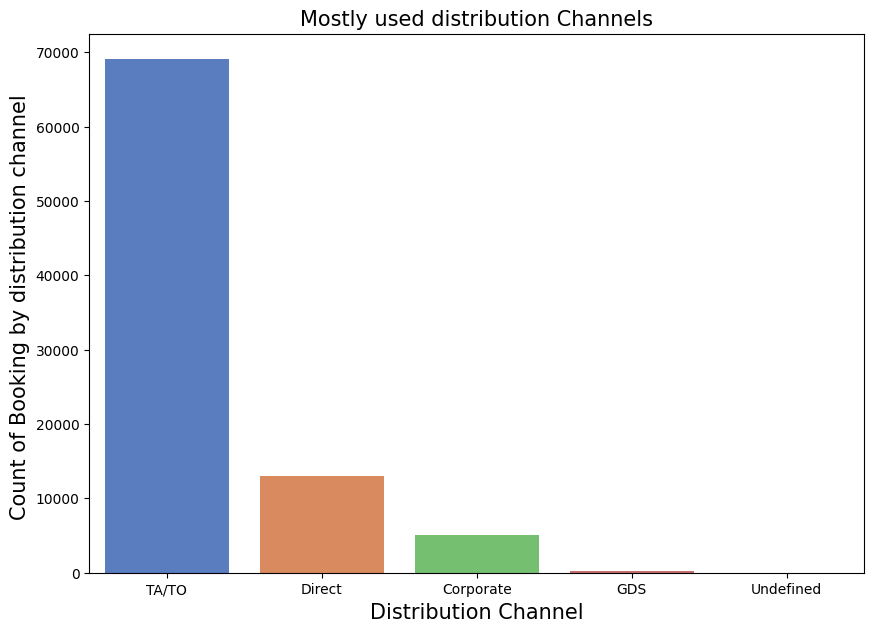

In [44]:
#Visualization
plt.figure(figsize=(10,7))

sns.countplot(x= hotel_booking_df['distribution_channel'],order=distribution_channel.index, palette='muted')
plt.title("Mostly used distribution Channels", fontsize = 15)
plt.xlabel('Distribution Channel', fontsize = 15)
plt.ylabel('Count of Booking by distribution channel ', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

The following chart represent maximum volume of booking done through which channel to represnt the numbers in descending order

##### 2. What is/are the insight(s) found from the chart?

Mostly used distribution channel is TA/TO channel.The total count of booking is 69028

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Distribution channel TA/TO is mostly used channel this makes positive impact.
* Distribution channel GDS and undefined is less used channels this makes negative impact.
* Use of TA/TO is 79.13% and use of GDS is 0.21%.**
* Other channels can provide those facilities which are provided by TA/TO channel.

**BIVARIATE ANALYSIS and MULTIVARIATE ANALYSIS**

**Chart -9**

**Which year has highest number of bookings?**

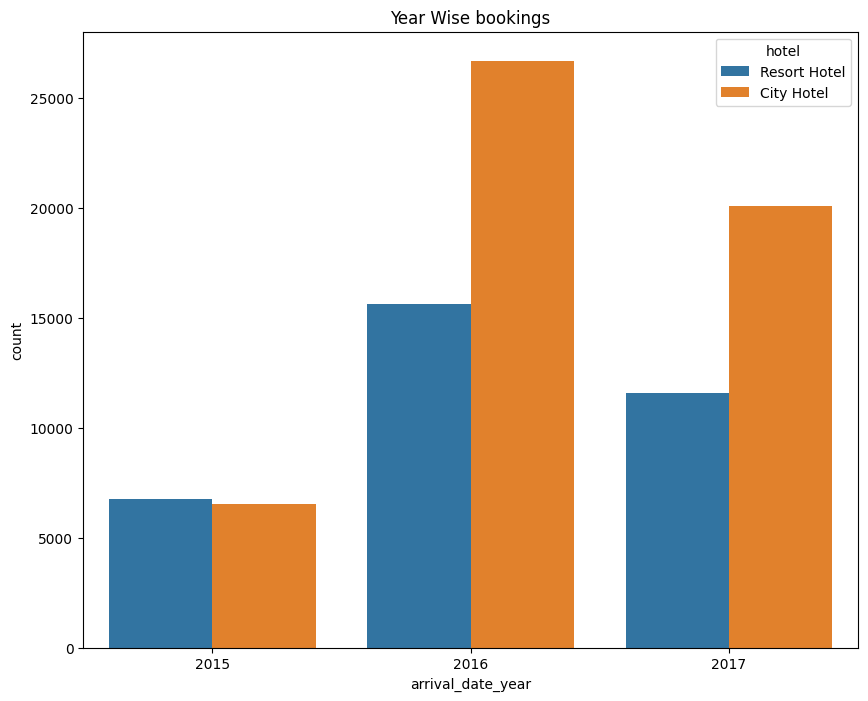

In [45]:
# set plot size
plt.figure(figsize=(10,8))
# plot with countplot
sns.countplot(x=hotel_booking_df['arrival_date_year'],hue=hotel_booking_df['hotel'])
plt.title("Year Wise bookings")
plt.show()


##### 1. Why did you pick the specific chart?

Because countplot is easy to understand.

##### 2. What is/are the insight(s) found from the chart?

2016 had highest bookings and 2015 had lowest bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Year 2016 had highest bookings this makes positive impact.
Year 2015 had lowest bookings  for city and resort hotel,this makes negative impact.
In 2016 there were 42313 bookings and In 2015 there were  only 13284 bookings
After year 2016 booking was decreased again , so they will have to find out the issues by asking for feedbacks from guest.

#### Chart - 10

**What is ADR accross different months?**

In [46]:
#  Using groupby funtion
bookings_by_months_df = hotel_booking_df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# It will take the order of the month list in the dataframe along with values
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'], categories = months, ordered = True)

# Sorting values
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df


,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


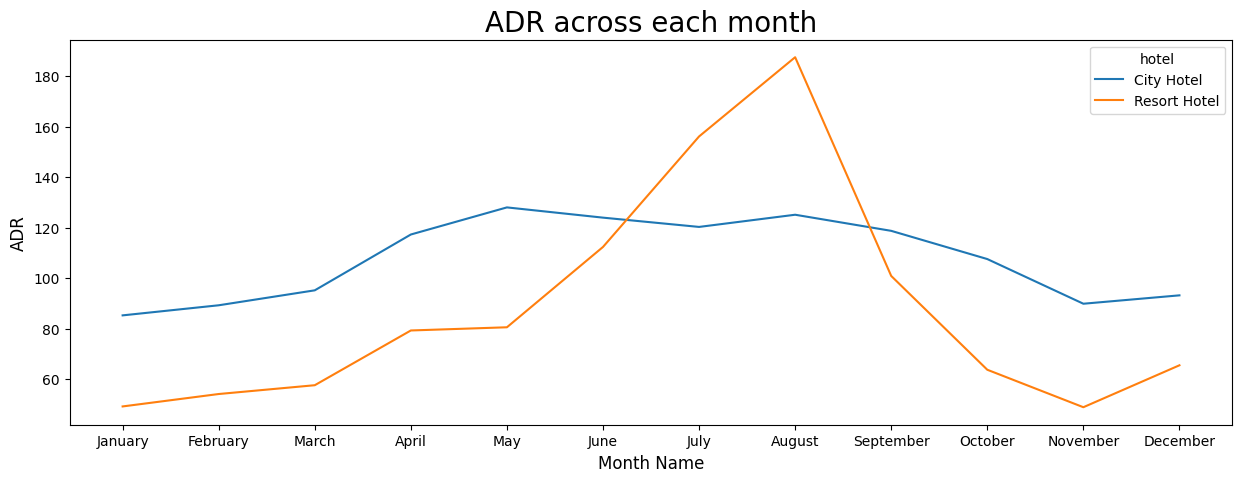

In [47]:
# Setting the chart size
plt.figure(figsize=(15,5))

# Plotting the values in a line chart
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# Setting the labels and title
plt.title('ADR across each month', fontsize=20)
plt.xlabel('Month Name', fontsize=12)
plt.ylabel('ADR', fontsize=12)

# Show chart
plt.show()

##### 1. Why did you pick the specific chart?

I have used line plot in this case because it effectively shows the trend of ADR over time

##### 2. What is/are the insight(s) found from the chart?

City Hotel : It is clear that City Hotel generates more revenue in May months in comparison to other months.

Resort Hotel : Resort Hotel generates more revenue in between July and August months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With the knowledge that City Hotel generates more revenue in May and Resort Hotel generates more revenue between July and August, hotels can focus marketing , promotions, and special offer to attract more guests during these peak months.

#### Chart - 11

**Which month has the most bookings in each hotel type?**

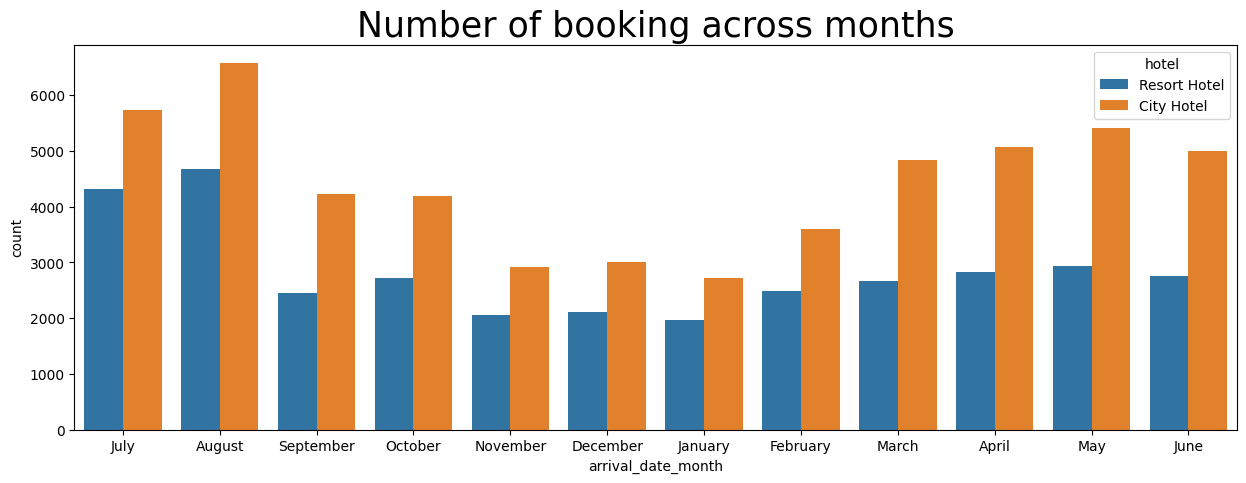

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(x=hotel_booking_df['arrival_date_month'],hue=hotel_booking_df['hotel'])
plt.title("Number of booking across months", fontsize = 25)
plt.show()

##### 1. Why did you pick the specific chart?

Count plots are used when you want to compare the  counts of different categories. In this case, it allows us to visually compare the number of bookings made for each month by hotel type

##### 2. What is/are the insight(s) found from the chart?

Above insight shows that August and July were 2 most busy months in compare to other

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is negative insight but hotel can use this insight to arrange everything in advance and welcome their guest in the best way possible and hotel can also run some promotional offer in these 2 months to attract more guests.

#### Chart - 12

Which distribution channel has highest adr?

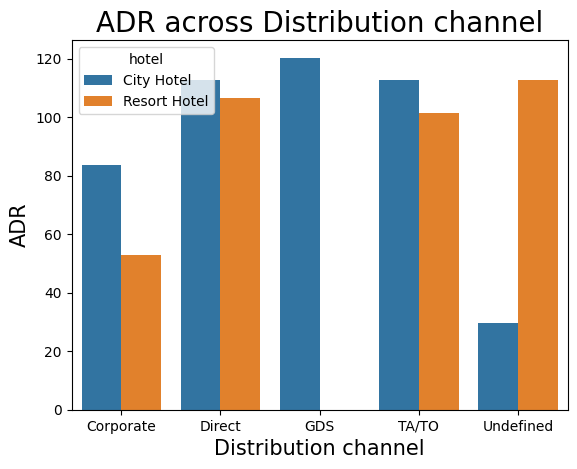

In [49]:
# Grouping dist_channel and hotels on their adr
distribution_channel = hotel_booking_df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# Visualization by using barplot
sns.barplot(x='distribution_channel',y='adr',data=distribution_channel,hue='hotel')
plt.title('ADR across Distribution channel', fontsize=20)
plt.xlabel('Distribution channel',fontsize=15)
plt.ylabel('ADR', fontsize=15)
dist_channel_adr = hotel_booking_df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()


##### 1. Why did you pick the specific chart?

I use here barplot to visualise ADR across distribution channel beacuse it give easy to undertand visualization to large data.



##### 2. What is/are the insight(s) found from the chart?


The insight find from the above chart is that GDS channel contributed most in ADR in city hotel and Direct and TA/TO has nearly equal contribution in adr in both hotel types.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


- GDS distribution channel contributed more to adr for city hotel

- Undefined distribution channel contributed more to adr for resort hotel this makes positive impact.

- GDS distribution channel has no any contribution to adr for resort hotel and undefined distribution channel contributed less to adr for city hotel this makes neative impact.

#### Chart - 13

**How does lead time vary accross different hotel types?**

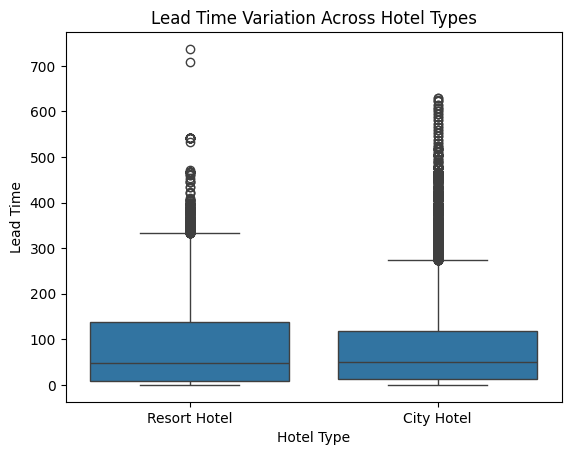

In [50]:
sns.boxplot(data=hotel_booking_df, x='hotel', y='lead_time')
plt.xlabel('Hotel Type')
plt.ylabel('Lead Time')
plt.title('Lead Time Variation Across Hotel Types')
plt.show()


##### 1. Why did you pick the specific chart?

---



The boxplot chart illustrates the variation in lead time (the duration between booking and arrival) across different hotel types.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart can guide setting appropriate guest expectations. By understanding the average lead time for different hotel types, the business can communicate realistic expectations to guests, especially regarding the time required for booking confirmation and preparation before arrival.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the average lead time for different hotel types, the business can communicate realistic expectations to guests, especially regarding the time required for booking confirmation and preparation before arrival.

#### Chart - 14 -Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(hotel_booking_df)
plt.show()

##### 1. Why did you pick the specific chart?

A pairs plot allows us to see both distribution of single variables and relationships between two variables .

We can see the realtionship between all the columns with each other in above chart.


##### 2. What is/are the insight(s) found from the chart?


From the above pair plot we can see that if cancellation increases then total stay also decreases.
As the total number of people increases adr also increases. Thus adr and total people are directly proportional to each other.

#### Chart - 15 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr_df = hotel_booking_df[['lead_time','previous_cancellations', 'previous_bookings_not_canceled', 'total_guest',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']].corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_df, annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True)

##### 1. Why did you pick the specific chart?

I choose heatmap here because heatmap finds the correlation and display a more generalized view of numeric values and also utilize color coded systems.


##### 2. What is/are the insight(s) found from the chart?

Highest corelation value between axis is 39% positive & lowest corelation value between the axis is -9% negative.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Inorder to achieve the business objective, i would suggest the client to make the price dynamic, introduce offers and packages to attract new customers. To retain the existing customers and ensure their repetition the client must introduce loyalty points program which can be redeemed by the customers in their next bookings..


# **Conclusion**

**These are some conclusions that we get after performing EDA.**

City hotel is mostly preferred hotel by guests.

Percentage of repeated guest is less which is 3.86%.

Cancellation rate is 27 %.

Mostly preferred food type is BBtype food.

Room type A is mostly preferred room type.

Agent no. 9 made the most bookings.

Most guests are coming from Portugal.

TA/TO distribution channel is mostly used and percentage is 79.13%.

For year 2016 highest bookings were there for both city and resort hotel.

City Hotel generates more revenue in May and Resort Hotel generates more
revenue between July and August.

GDS channel contributed most in ADR in city hotel and Direct and TA/TO has nearly equal contribution in adr in both hotel types.